In [67]:
#Dependencies
import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from sqlalchemy import extract 
from sqlalchemy import Column, Integer, DateTime
from sqlalchemy.sql.expression import exists
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from sqlalchemy import distinct

In [68]:
#Create the engine which is used to connect to the new 'hawaii' database that will be created 
engine = create_engine('sqlite:///hawaii.db')

In [69]:
#Verify data was populated into measurments table within database
engine.execute("select * from measurements").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (6, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (7, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (8, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (9, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (10, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (11, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (12, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (13, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (14, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (15, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (16, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (17, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (19, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (20, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-24', 0.01, 71.0),
 (22, 'USC00519397

In [70]:
#Verify data was populated into stations table within database
engine.execute("select * from stations").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [71]:
#Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [72]:
#Save a reference to the measurements table as `measurements`
Measurements = Base.classes.measurements

In [73]:
#Save a reference to the stations table as `stations`
Stations = Base.classes.stations

In [74]:
#Create a database session object
session = Session(engine)

In [75]:
#Return column names for measurements table
Measurements.__table__.columns.keys()

['id', 'station', 'Date', 'Prcp', 'Tobs']

In [76]:
#Return column names for stations table 
Stations.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [77]:
#Precipitation Analysis
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.
#Load the query results into a Pandas DataFrame and set the index to the date column.
#Plot the results using the DataFrame plot method.

#Sqlalchemy statement for precipitation analyis
prev_year = datetime.date.today() - datetime.timedelta(days=365)
Precipitation = session.query(Measurements.Date, Measurements.Prcp).filter(Measurements.Date >= prev_year).statement

#Convert sqlalchemy query to dataframe
df1 = pd.read_sql_query(Precipitation, session.bind)
df1.head(10)

Date  Prcp
0  2017-01-25  0.03
1  2017-01-26  0.00
2  2017-01-27  0.00
3  2017-01-28  0.00
4  2017-01-29  0.18
5  2017-01-30  0.00
6  2017-01-31  0.00
7  2017-02-01  0.00
8  2017-02-02  0.00
9  2017-02-03  0.00

In [78]:
#View datatypes 
df1.dtypes

Date     object
Prcp    float64
dtype: object

In [79]:
#Convert Date column to datetime
df1['Date'] = pd.to_datetime(df1.Date)

In [80]:
#Verify datatype for Date column was updated 
df1.dtypes

Date    datetime64[ns]
Prcp           float64
dtype: object

In [81]:
#Reset index to Date column for bar graph  
df1.set_index('Date', inplace=True)
df1.head(10)

Prcp
Date            
2017-01-25  0.03
2017-01-26  0.00
2017-01-27  0.00
2017-01-28  0.00
2017-01-29  0.18
2017-01-30  0.00
2017-01-31  0.00
2017-02-01  0.00
2017-02-02  0.00
2017-02-03  0.00

<IPython.core.display.Javascript object>


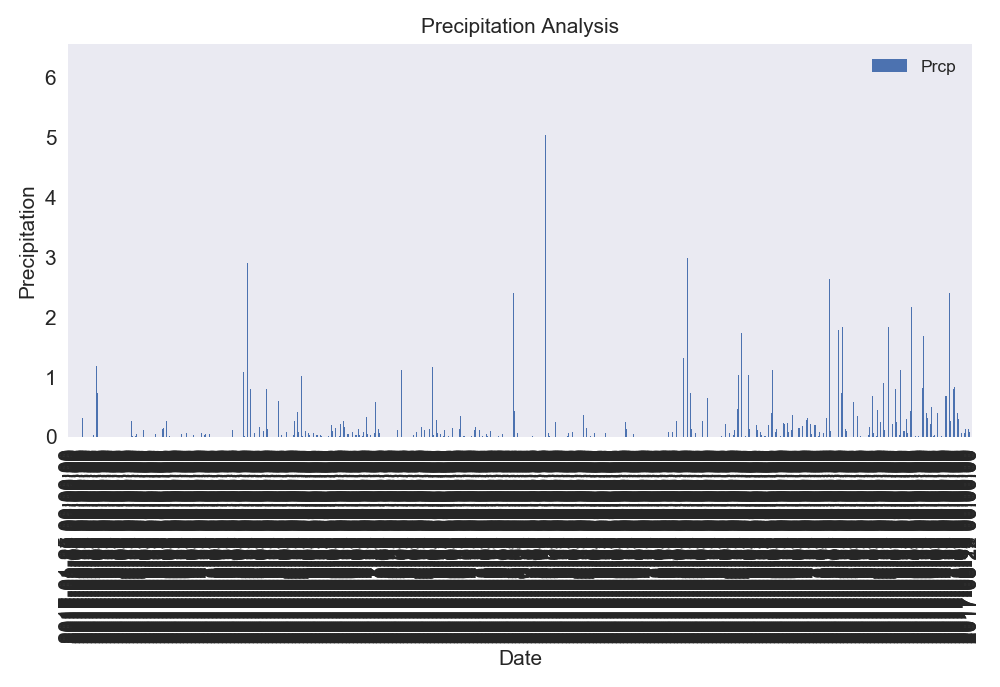

In [82]:
#Create bar chart for precipitation analysis
df1.plot.bar(title="Precipitation Analysis", fontsize="large")
plt.xlabel('Date', fontsize="large")
plt.ylabel('Precipitation', fontsize="large")
           
#plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m.%Y'))

plt.tight_layout()
plt.grid()
plt.show()

In [83]:
#Print summary statistics for precipitation analysis
df1.describe()

Prcp
count  1138.000000
mean      0.178568
std       0.472429
min       0.000000
25%       0.000000
50%       0.010000
75%       0.120000
max       6.250000

In [84]:
#Station Analysis
#Design a query to calculate the total number of stations.
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with bins=12.

#Sqlalchemy statement to calculate the total number of unique stations
Station = session.query(Stations.station).distinct().count()
print(Station)

9
